# Task 1

In [100]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [101]:
img = cv2.imread('Picture1.jpg')

In [102]:
RGB_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [103]:
gray_img=cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)

In [104]:
threshhold = 127
binary_img = cv2.threshold(gray_img, threshhold, 255, cv2.THRESH_BINARY)[1]
bp = np.sum(binary_img == 0)

Black Pixels:  79883


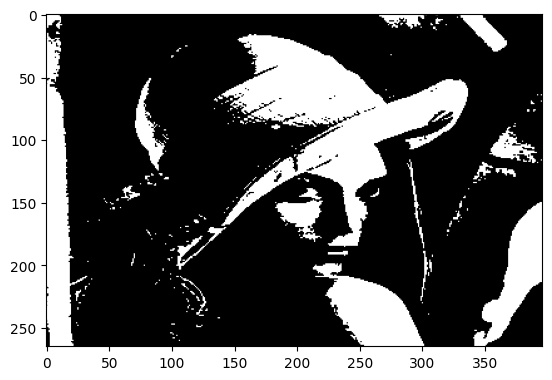

In [105]:
plt.imshow(binary_img, cmap='gray')
print("Black Pixels: ", bp)

In [114]:
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

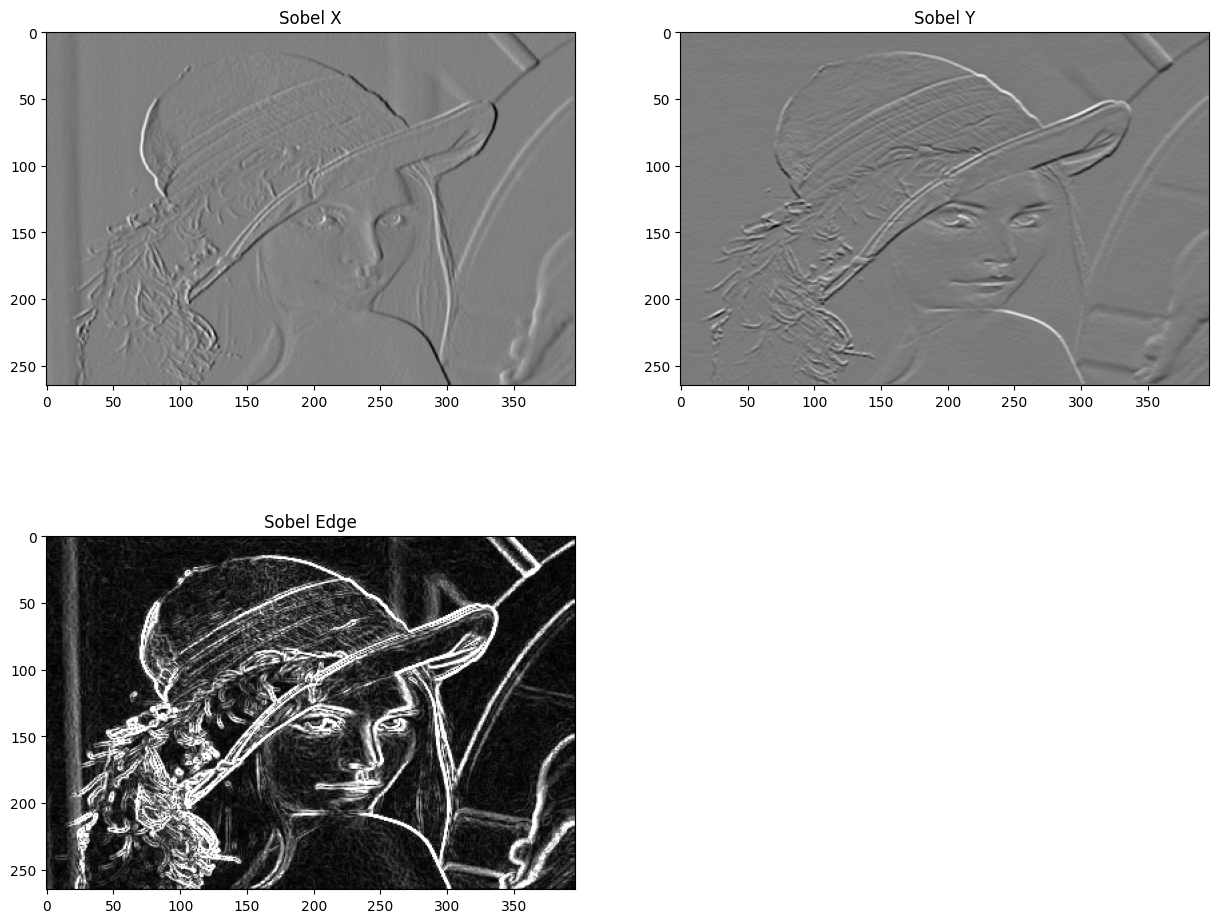

In [124]:
plt.figure(figsize=(15,12))
plt.subplot(221), plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel X")
plt.subplot(222), plt.imshow(sobel_y, cmap='gray'), plt.title("Sobel Y")
plt.subplot(223), plt.imshow(sobel_combined,cmap='gray'), plt.title("Sobel Edge")
plt.show()

In [108]:
prewitt_x = cv2.filter2D(gray_img, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_y = cv2.filter2D(gray_img, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_combined = cv2.bitwise_or(prewitt_x, prewitt_y)

(<matplotlib.image.AxesImage at 0x1b58bea3d90>, Text(0.5, 1.0, 'Prewitt Edge'))

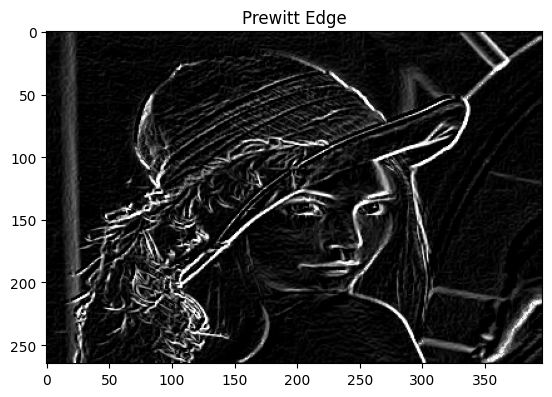

In [109]:

plt.imshow(prewitt_combined, cmap='gray'), plt.title("Prewitt Edge")

In [110]:
roberts_cross_x = np.array([[1, 0], [0, -1]])
roberts_cross_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_img, -1, roberts_cross_x)
roberts_y = cv2.filter2D(gray_img, -1, roberts_cross_y)
roberts_combined = cv2.bitwise_or(roberts_x, roberts_y)

(<matplotlib.image.AxesImage at 0x1b58aa7b670>, Text(0.5, 1.0, 'Roberts Edge'))

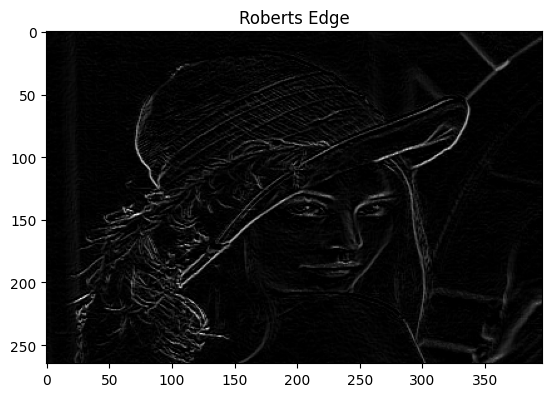

In [111]:

plt.imshow(roberts_combined, cmap='gray'), plt.title("Roberts Edge")

In [112]:
canny_edges = cv2.Canny(gray_img, 100, 200)

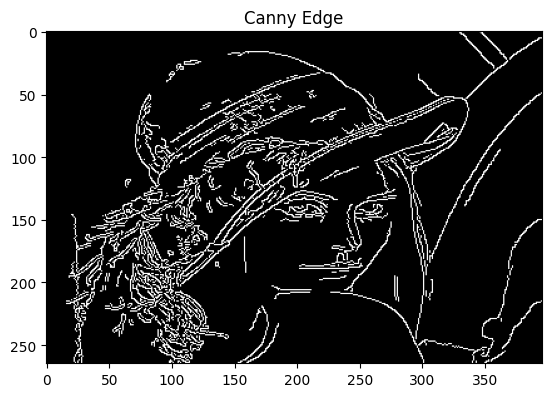

In [113]:

plt.imshow(canny_edges, cmap='gray'), plt.title("Canny Edge")
plt.show()

In [125]:
_, global_thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

In [126]:
adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [143]:
_, binary = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(binary, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown == 255] = 0

markers = cv2.watershed(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), markers)

gray_img[markers == -1] = [255]



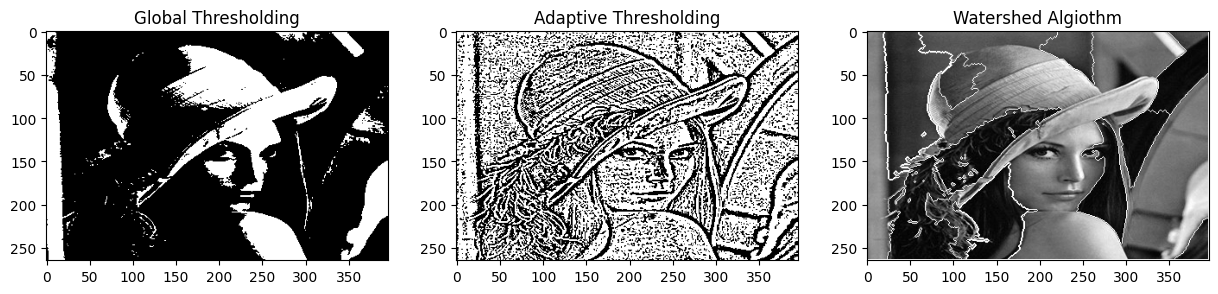

In [144]:
plt.figure(figsize=(15,12))
plt.subplot(131), plt.imshow(global_thresh, cmap='gray'), plt.title("Global Thresholding")
plt.subplot(132), plt.imshow(adaptive_thresh, cmap='gray'), plt.title("Adaptive Thresholding")
plt.subplot(133), plt.imshow(gray_img,cmap='gray'), plt.title("Watershed Algiothm")
plt.show()